In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = cv2.imread('Files/001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_gaussian = cv2.GaussianBlur(gray, (9,9), 0)
gray_bilateral = cv2.bilateralFilter(gray,9,75,75)

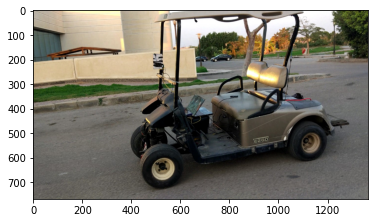

In [3]:
plt.imshow(img[:,:,::-1]);

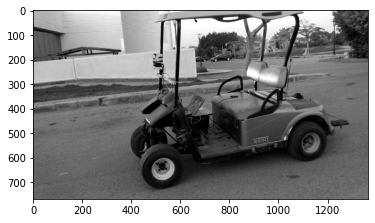

In [4]:
plt.imshow(gray , cmap="gray");

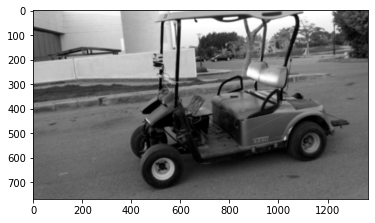

In [5]:
plt.imshow(gray_gaussian , cmap="gray");

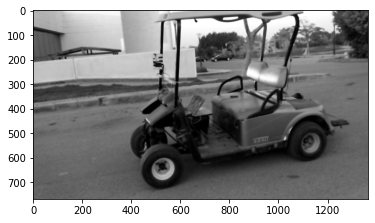

In [6]:
plt.imshow(gray_bilateral , cmap="gray");

### Scharr filter

In [7]:
Scharr_y = np.array(
    [
        [3, 10, 3],
        [0, 0, 0],
        [-3, -10, -3]
    ])

In [8]:
Scharr_x = np.array(
    [
        [3, 0, -3],
        [10, 0, -10],
        [3, 0, -3]
    ])

In [9]:
filtered_gray_Scharr_y = cv2.filter2D(gray_bilateral, -1, Scharr_y)
filtered_gray_Scharr_x = cv2.filter2D(gray_bilateral, -1, Scharr_x)

In [10]:
np.max(filtered_gray_Scharr_x)

255

In [11]:
filtered_gray_Scharr_xy = np.sqrt(np.power(filtered_gray_Scharr_x/np.max(filtered_gray_Scharr_x), 2)+np.power(filtered_gray_Scharr_y/np.max(filtered_gray_Scharr_y), 2))

In [12]:
img_scharr_x = cv2.Scharr(gray_bilateral, cv2.CV_8U, 1, 0)
img_scharr_y = cv2.Scharr(gray_bilateral, cv2.CV_8U, 0, 1)
img_scharr_x_s = cv2.convertScaleAbs(img_scharr_x)
img_scharr_y_s = cv2.convertScaleAbs(img_scharr_y)
img_scharr_xy = cv2.addWeighted(img_scharr_x_s, 0.5, img_scharr_y_s, 0.5, 0)

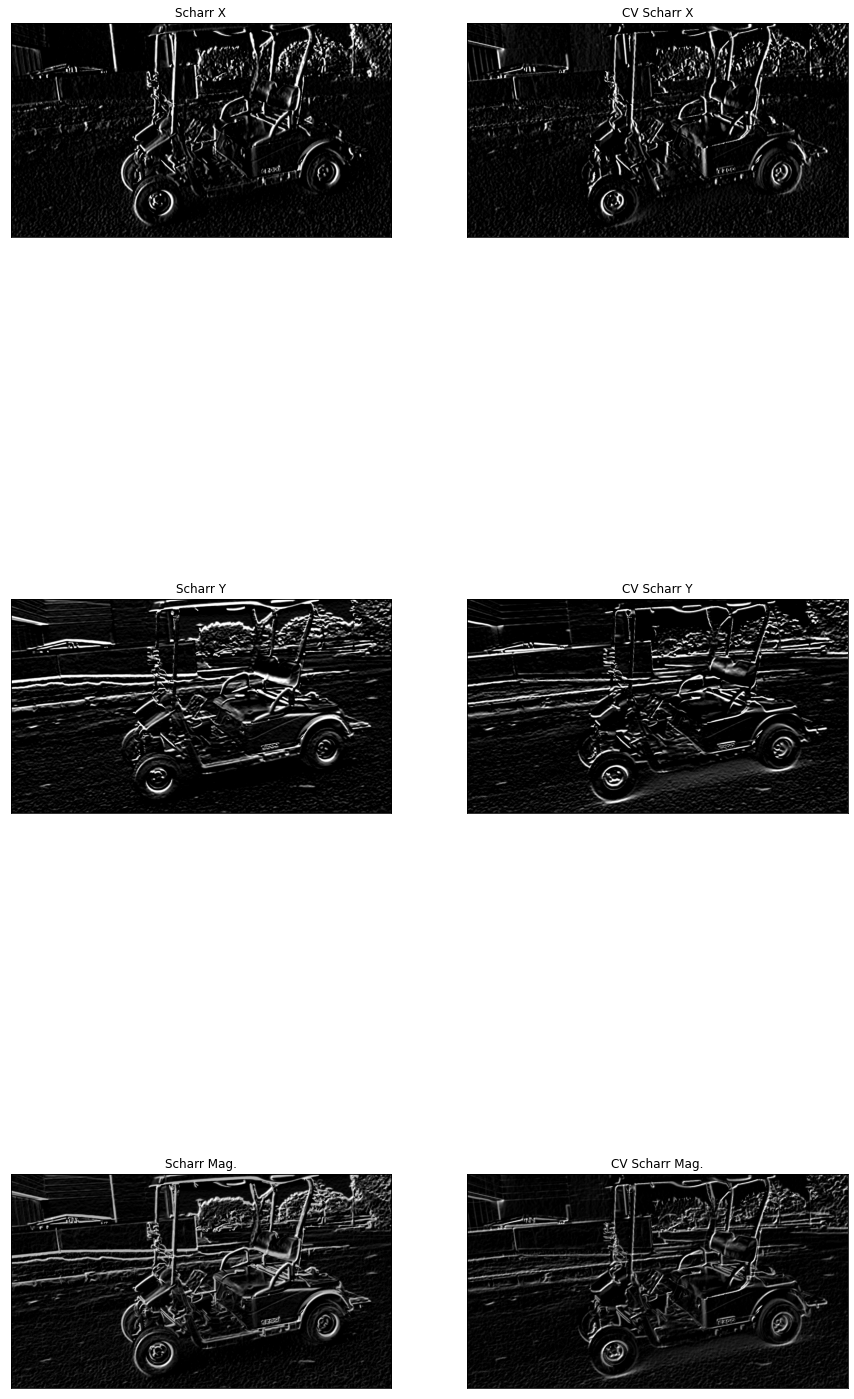

In [13]:
plt.figure(figsize=(15,30))
# plt.subplot(7,1,1),plt.imshow(gray_bilateral,cmap = 'gray')
# plt.title('Gray bilateral original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,1),plt.imshow(filtered_gray_Scharr_x,cmap = 'gray')
plt.title('Scharr X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(img_scharr_x,cmap = 'gray')
plt.title('CV Scharr X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(filtered_gray_Scharr_y,cmap = 'gray')
plt.title('Scharr Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(img_scharr_y,cmap = 'gray')
plt.title('CV Scharr Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(filtered_gray_Scharr_xy,cmap = 'gray')
plt.title('Scharr Mag.'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(img_scharr_xy,cmap = 'gray')
plt.title('CV Scharr Mag.'), plt.xticks([]), plt.yticks([])
plt.show()

### Prewitt filter

In [14]:
Prewitt_y = np.array(
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])

In [15]:
Prewitt_x = np.array(
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

In [16]:
filtered_gray_Prewitt_y = cv2.filter2D(gray_bilateral, -1, Prewitt_y)
filtered_gray_Prewitt_x = cv2.filter2D(gray_bilateral, -1, Prewitt_x)

In [17]:
filtered_gray_Prewitt_xy = np.sqrt(np.power(filtered_gray_Prewitt_x/np.max(filtered_gray_Prewitt_y), 2)+np.power(filtered_gray_Prewitt_y/np.max(filtered_gray_Prewitt_y), 2))

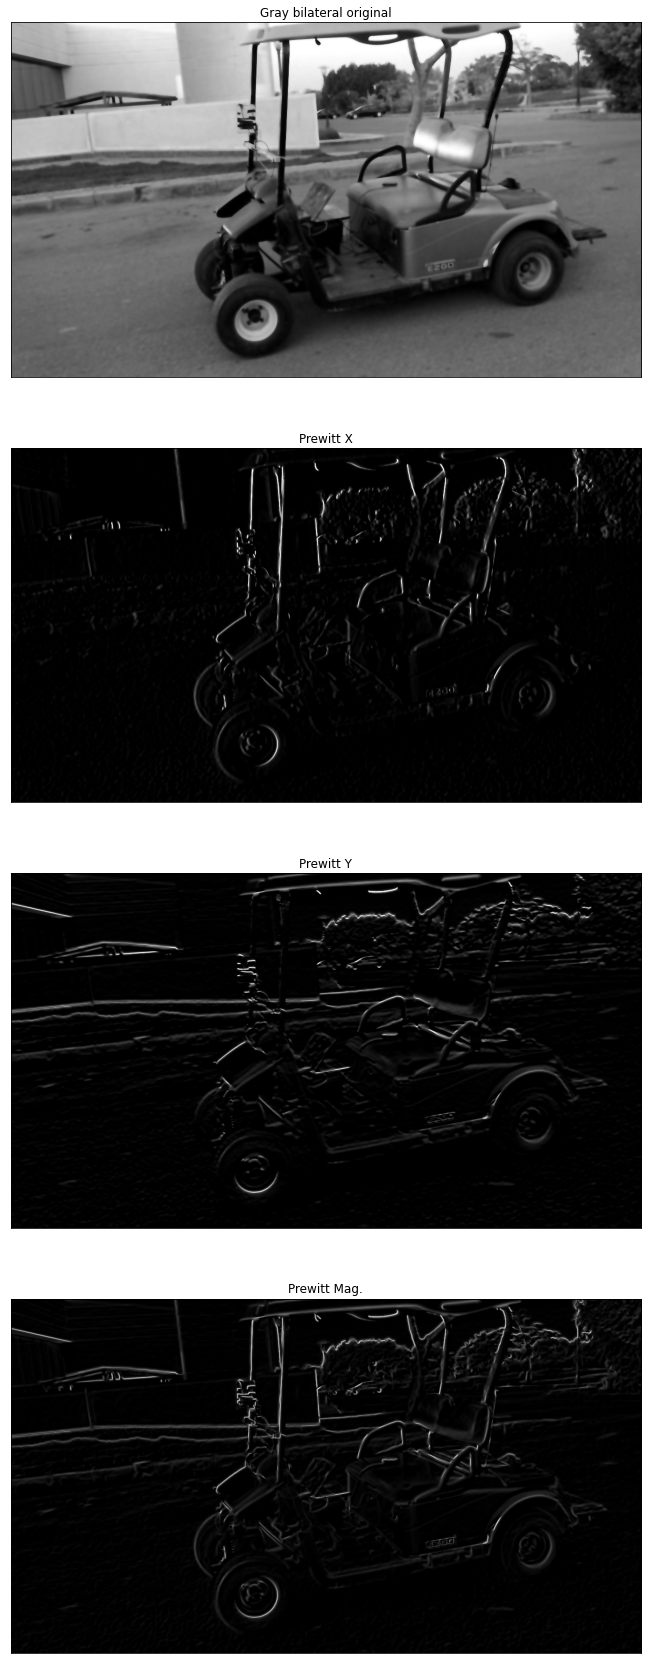

In [18]:
plt.figure(figsize=(25,30))
plt.subplot(4,1,1),plt.imshow(gray_bilateral,cmap = 'gray')
plt.title('Gray bilateral original'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,2),plt.imshow(filtered_gray_Prewitt_x,cmap = 'gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,3),plt.imshow(filtered_gray_Prewitt_y,cmap = 'gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,4),plt.imshow(filtered_gray_Prewitt_xy,cmap = 'gray')
plt.title('Prewitt Mag.'), plt.xticks([]), plt.yticks([])
plt.show()

### Roberts filter

In [19]:
Roberts_y = np.array(
    [
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 0]
    ])

In [20]:
Roberts_x = np.array(
    [
        [0, 1, 0],
        [-1, 0, 0],
        [0, 0, 0]
    ])

In [21]:
filtered_gray_Roberts_y = cv2.filter2D(gray_bilateral, -1, Roberts_y)
filtered_gray_Roberts_x = cv2.filter2D(gray_bilateral, -1, Roberts_x)

In [22]:
filtered_gray_Roberts_xy = np.sqrt(np.power(filtered_gray_Roberts_x/np.max(filtered_gray_Roberts_x), 2)+np.power(filtered_gray_Roberts_y/np.max(filtered_gray_Roberts_y), 2))
# filtered_gray_Roberts_xy

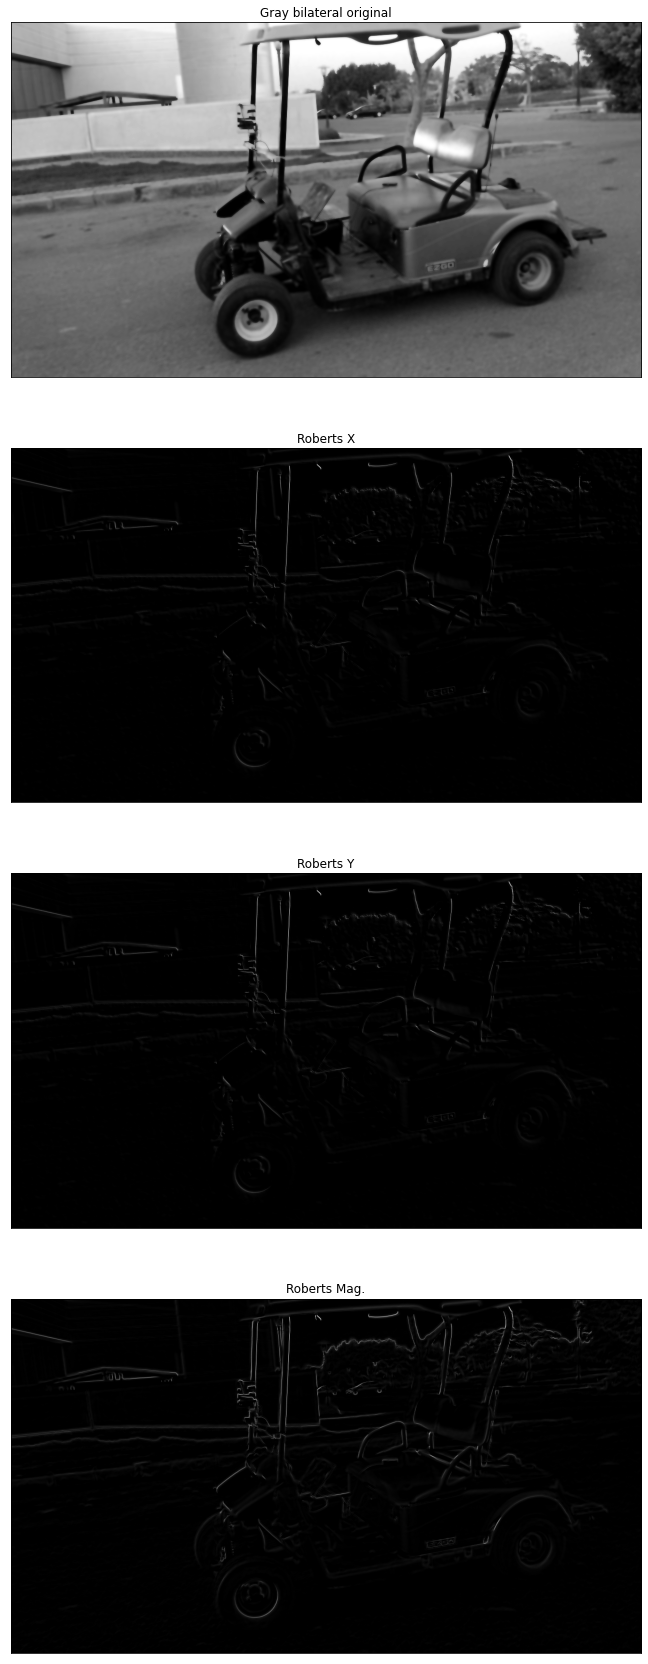

In [24]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1),plt.imshow(gray_bilateral,cmap = 'gray')
plt.title('Gray bilateral original'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,2),plt.imshow(filtered_gray_Roberts_x,cmap = 'gray')
plt.title('Roberts X'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,3),plt.imshow(filtered_gray_Roberts_x,cmap = 'gray')
plt.title('Roberts Y'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,4),plt.imshow(filtered_gray_Roberts_xy,cmap = 'gray')
plt.title('Roberts Mag.'), plt.xticks([]), plt.yticks([])
plt.show()